<a href="https://colab.research.google.com/github/DariuszKobiela/DigitPredictorAI/blob/master/NN_GOOGLE_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import tensorflow
tensorflow.__version__

'2.2.0-rc3'

# IMPORTS

In [0]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.metrics import Accuracy, Recall, Precision
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model


def load_data_for_NN(root_directory):
    mnist_train = pd.read_csv(root_directory+"data/mnist_train.csv")
    mnist_test = pd.read_csv(root_directory+"data/mnist_test.csv")
    y_train = mnist_train.label.values
    y_test = mnist_test.label.values
    x_train = mnist_train.values[:, 1:]
    x_test = mnist_test.values[:, 1:]
    # Standardization
    x_train = np.array([(x - x.mean()) / x.std() for x in x_train])
    x_test = np.array([(x - x.mean()) / x.std() for x in x_test])
    x_train = x_train.astype('float32').reshape(-1, 28, 28, 1)
    x_test = x_test.astype('float32').reshape(-1, 28, 28, 1)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, y_train, x_test, y_test


def load_images(root_directory):
    mnist = pd.read_csv(root_directory+"data/mnist_test.csv")
    y = mnist.label.values
    x = mnist.values[:, 1:].astype('float32').reshape(-1, 28, 28)
    return x, y


def model_DNN():
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 1]))
    model.add(Dense(512))
    model.add(Dense(128))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model


def model_CNN():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['acc'])
    return model


def get_checkpoint_path(model_name, root_directory):
    checkpoint_path = root_directory + model_name + "_training/cp.ckpt"
    return checkpoint_path


def fit_model(model, model_name, x_train, y_train, batch_size, num_epoch, root_directory):
    checkpoint_path = get_checkpoint_path(model_name, root_directory)
    cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                  save_best_only=True,
                                  save_weights_only=True,
                                  verbose=1,
                                  monitor="loss",
                                  mode='auto', 
                                  save_freq='epoch'
                                )
    model_log = model.fit(x_train, y_train, batch_size=batch_size, validation_split=0.3, epochs=num_epoch,
                          verbose=1, callbacks=[cp_callback])
    return model_log, model


def validate(model, x_train, y_train, x_test, y_test):
    score = model.evaluate(x_train, y_train, verbose=0)
    print('Train loss:', score[0], end=", ")
    print('Train accuracy:', score[1])
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0], end=", ")
    print('Test accuracy:', score[1])
    print(model.summary())


def save_model_plot(model, model_name, root_directory):
    plot_model(model, to_file=root_directory+"images/" + model_name + '_architecture.png', show_shapes=True, show_layer_names=False)


def plot_metric(model_log, metric_name, model_name, root_directory):
    fig = plt.figure()
    fig.set_size_inches(6, 4)
    plt.plot(model_log.history[metric_name])
    plt.plot(model_log.history['val_' + metric_name])
    plt.title('model' + model_name + " - " + metric_name)
    plt.ylabel(metric_name)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.savefig(root_directory + "images/" + model_name + '_' + metric_name + '.png')


# TRAINING

In [25]:
x_train.shape

(60000, 28, 28, 1)

--------------------------------
Epoch 1/3
320/329 [============================>.] - ETA: 0s - loss: 2.3049 - acc: 0.1152
Epoch 00001: loss improved from inf to 2.30304, saving model to /content/drive/My Drive/COLAB/CNN_training/cp.ckpt
329/329 [==============================] - 2s 8ms/step - loss: 2.3030 - acc: 0.1163 - val_loss: 2.2059 - val_acc: 0.2565
Epoch 2/3
325/329 [============================>.] - ETA: 0s - loss: 2.1909 - acc: 0.2178
Epoch 00002: loss improved from 2.30304 to 2.18984, saving model to /content/drive/My Drive/COLAB/CNN_training/cp.ckpt
329/329 [==============================] - 2s 7ms/step - loss: 2.1898 - acc: 0.2184 - val_loss: 2.0857 - val_acc: 0.5297
Epoch 3/3
321/329 [============================>.] - ETA: 0s - loss: 2.0820 - acc: 0.3209
Epoch 00003: loss improved from 2.18984 to 2.08100, saving model to /content/drive/My Drive/COLAB/CNN_training/cp.ckpt
329/329 [==============================] - 2s 7ms/step - loss: 2.0810 - acc: 0.3221 - val_loss: 1.9571

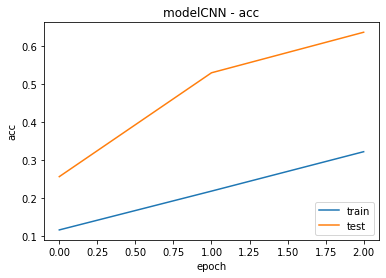

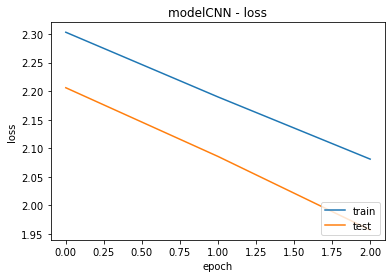

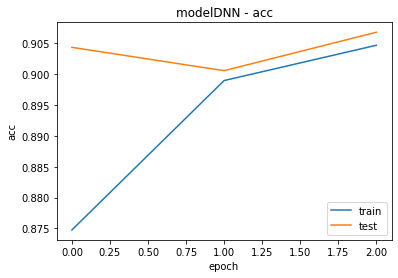

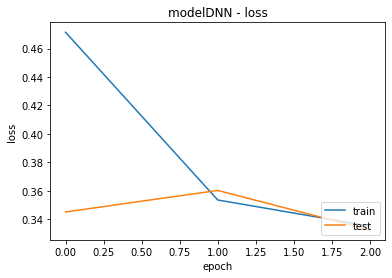

In [27]:
batch_size = 128
num_epoch = 3
root_directory = "/content/drive/My Drive/COLAB/"

print("--------------------------------")
#przy gorszej wartosci accuracy dla większej ilosci epok nie powinien zapisywac do dysku google

x_train, y_train, x_test, y_test = load_data_for_NN(root_directory)

for model_name, model in [("CNN", model_CNN()), ("DNN", model_DNN())]:
  
#for model_name, model in [("CNN", model_CNN())]:
    model_log, model = fit_model(model, model_name, x_train, y_train, batch_size, num_epoch, root_directory)
    validate(model, x_train, y_train, x_test, y_test)
    save_model_plot(model, model_name, root_directory)
    for metric_name in ['acc', 'loss']:
        plot_metric(model_log, metric_name, model_name, root_directory)

In [0]:
root_directory = "/content/drive/My Drive/COLAB/"

x_train, y_train, x_test, y_test = load_data_for_NN(root_directory)

# LOADING

In [21]:
model_name = "CNN"
checkpoint_path = get_checkpoint_path(model_name, root_directory)
checkpoint_dir = os.path.dirname(checkpoint_path)

model = model_CNN()
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

print(x_test[0].shape)
print(model.predict(x_test[0].reshape(1, 28, 28, 1)))

(28, 28, 1)
[[0.02081079 0.00221599 0.01361299 0.00401894 0.03379714 0.00661913
  0.00500597 0.87432575 0.01624172 0.02335158]]


In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8758 - acc: 0.8176


[0.8758134245872498, 0.8176000118255615]